In [372]:
import numpy as np
import random
from shapely.geometry import Polygon,Point
import pandas as pd 
#import h3
import folium

import matplotlib.pyplot as plt

In [373]:
poly = Polygon([(27.741969, 85.333064),
                (27.722305, 85.292919),
                (27.688432, 85.285059),
                (27.657974, 85.322721),
                (27.677999, 85.349656)])

In [374]:
#Defining the randomization generator

#for clients
def polygon_random_points(poly, num_points):
    min_x, min_y, max_x, max_y = poly.bounds
    
    points = []

    while len(points) < num_points:
        random_point = Point([random.uniform(min_x, max_x), random.uniform(min_y, max_y)])
        if (random_point.within(poly)):
            points.append(random_point)
    return points

points = polygon_random_points(poly,500)

latitude = []
longitude = []

# Printing the results.
for p in points:
    latitude.append(p.x)
    longitude.append(p.y)

df = pd.DataFrame()
df['Latitude'] = latitude
df['Longitude'] = longitude
df

,Latitude,Longitude
0,27.700865,85.338317
1,27.683928,85.331757
2,27.690685,85.292548
3,27.700877,85.301756
4,27.683505,85.304658
...,...,...
495,27.695683,85.340795
496,27.706728,85.340035
497,27.680479,85.334122
498,27.714685,85.329649


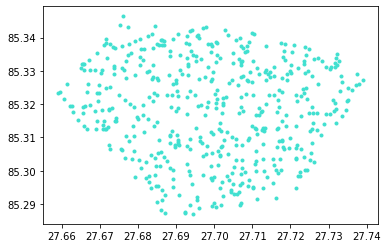

In [375]:
plt.plot(df['Latitude'], df['Longitude'], marker = '.', linewidth = 0, color = 'turquoise')

In [395]:
map1 = folium.Map(location=[df.Latitude.mean(), df.Longitude.mean()],
                 zoom_start=16, control_scale=True)

In [398]:
for index, location_info in df.iterrows():
    folium.CircleMarker([location_info["Latitude"], location_info["Longitude"]], radius = 4,color = 'black').add_to(map1)
map1

In [399]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

In [400]:
kms_per_radian = 6371.0088
epsilon = 0.2/ kms_per_radian
clustering = DBSCAN(eps=epsilon, min_samples=2, algorithm='ball_tree', metric='haversine').fit(np.radians(df))
cluster_labels = clustering.labels_
num_clusters = len(set(cluster_labels))
num_clusters

108

In [401]:
np.radians(df)

,Latitude,Longitude
0,0.483471,1.489435
1,0.483176,1.489320
2,0.483294,1.488636
3,0.483472,1.488797
4,0.483168,1.488847
...,...,...
495,0.483381,1.489478
496,0.483574,1.489465
497,0.483116,1.489361
498,0.483713,1.489283


In [413]:
#np.unique(cluster_labels)

In [403]:
#cluster_labels

In [404]:
silhouette_score(df, cluster_labels)

0.22238104417379798

In [405]:
outliers_df = df[cluster_labels == -1]
clusters_df = df[cluster_labels != -1]

colors = cluster_labels
color_clusters = colors[colors!=-1]
color_outliers = 'white'

#len(np.unique(color_clusters))

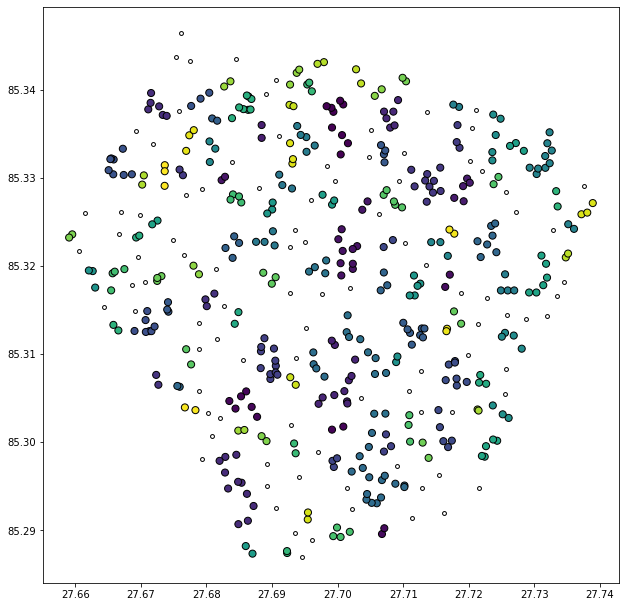

In [411]:
fig = plt.figure(figsize = (8,8))

ax = fig.add_axes([.1,.1,1,1])

ax.scatter(clusters_df['Latitude'], clusters_df['Longitude'], c = color_clusters, edgecolor = 'black', s = 50)
ax.scatter(outliers_df['Latitude'], outliers_df['Longitude'], c = color_outliers, edgecolor = 'black', s = 15)
plt.show()